In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from sklearn.datasets import fetch_california_housing

In [12]:
housing = fetch_california_housing()

In [15]:
print(housing.feature_names)  # List the feature names
print(housing.DESCR)  # Print the dataset description

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousan

In [14]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [18]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


Preparing The Dataset

In [19]:
dataset=pd.DataFrame(housing.data,columns=housing.feature_names)


In [20]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [21]:
dataset['Price']=housing.target


In [22]:
dataset.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [24]:
dataset.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [25]:
dataset.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [31]:
### EXploratory Data Analysis
## Correlation
corr_matrix=dataset.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [32]:
# 1. Identifying Strong Correlations:**

# Print high correlations (> 0.7)
for i, row in corr_matrix.iterrows():
    for col in row.index:
        if i != col and abs(row[col]) > 0.7:
            print(f"Strong correlation between {i} and {col}: {row[col]}")


Strong correlation between AveRooms and AveBedrms: 0.8476213257130424
Strong correlation between AveBedrms and AveRooms: 0.8476213257130424
Strong correlation between Latitude and Longitude: -0.9246644339150366
Strong correlation between Longitude and Latitude: -0.9246644339150366


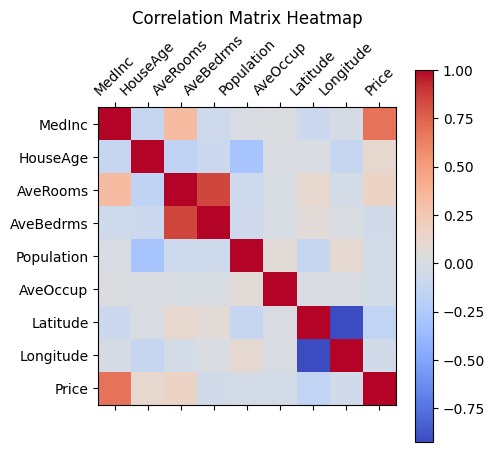

In [33]:
# 2. Visualizing Correlations with Heatmap:**

plt.matshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [35]:
from scipy.stats import pearsonr

In [36]:
# 3. Statistical Significance Testing:**

# Calculate p-values for each correlation (using Pearson's correlation)
for i, row in corr_matrix.iterrows():
    for col in row.index:
        if i != col:
            corr, p_value = pearsonr(dataset[i], dataset[col])
            print(f"Correlation between {i} and {col}: {corr:.2f}, p-value: {p_value:.4f}")


Correlation between MedInc and HouseAge: -0.12, p-value: 0.0000
Correlation between MedInc and AveRooms: 0.33, p-value: 0.0000
Correlation between MedInc and AveBedrms: -0.06, p-value: 0.0000
Correlation between MedInc and Population: 0.00, p-value: 0.4874
Correlation between MedInc and AveOccup: 0.02, p-value: 0.0070
Correlation between MedInc and Latitude: -0.08, p-value: 0.0000
Correlation between MedInc and Longitude: -0.02, p-value: 0.0292
Correlation between MedInc and Price: 0.69, p-value: 0.0000
Correlation between HouseAge and MedInc: -0.12, p-value: 0.0000
Correlation between HouseAge and AveRooms: -0.15, p-value: 0.0000
Correlation between HouseAge and AveBedrms: -0.08, p-value: 0.0000
Correlation between HouseAge and Population: -0.30, p-value: 0.0000
Correlation between HouseAge and AveOccup: 0.01, p-value: 0.0581
Correlation between HouseAge and Latitude: 0.01, p-value: 0.1085
Correlation between HouseAge and Longitude: -0.11, p-value: 0.0000
Correlation between HouseAge 

Text(0, 0.5, 'Price')

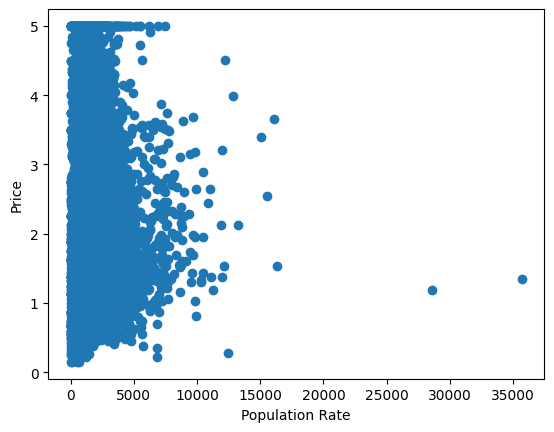

In [38]:
plt.scatter(dataset['Population'],dataset['Price'])
plt.xlabel("Population Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

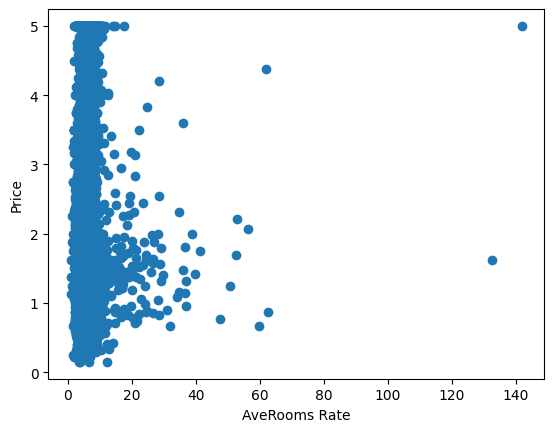

In [39]:
plt.scatter(dataset['AveRooms'],dataset['Price'])
plt.xlabel("AveRooms Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

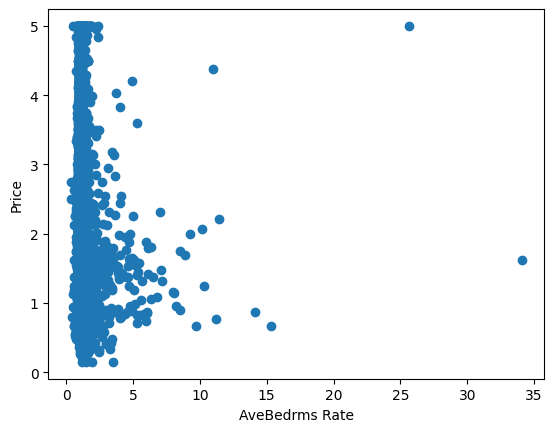

In [40]:

plt.scatter(dataset['AveBedrms'],dataset['Price'])
plt.xlabel("AveBedrms Rate")
plt.ylabel("Price")

<Axes: xlabel='Population', ylabel='Price'>

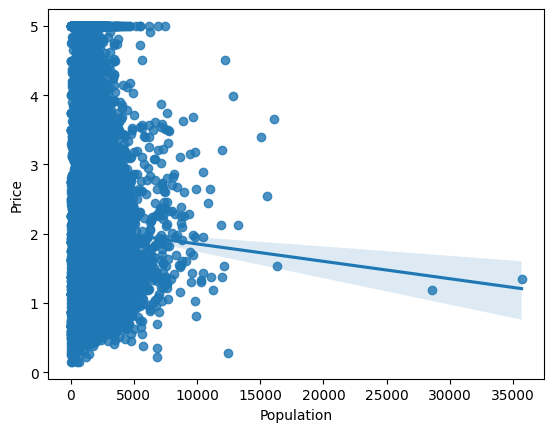

In [42]:
import seaborn as sns
sns.regplot(x="Population",y="Price",data=dataset)

In [43]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [44]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [45]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [46]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
X_train.shape


(14448, 8)

In [49]:
X_test.shape

(6192, 8)

In [51]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [52]:
X_train=scaler.fit_transform(X_train)


In [53]:
X_test=scaler.transform(X_test)


In [55]:
X_train.shape

(14448, 8)

In [56]:
X_test.shape

(6192, 8)

Model Training

In [57]:
from sklearn.linear_model import LinearRegression


In [58]:
regression=LinearRegression()


In [59]:
regression.fit(X_train,y_train)


LinearRegression()

In [60]:
print(regression.coef_)


[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [61]:
print(regression.intercept_)

2.0692396089424165


In [62]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [63]:
reg_pred=regression.predict(X_test)


In [64]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

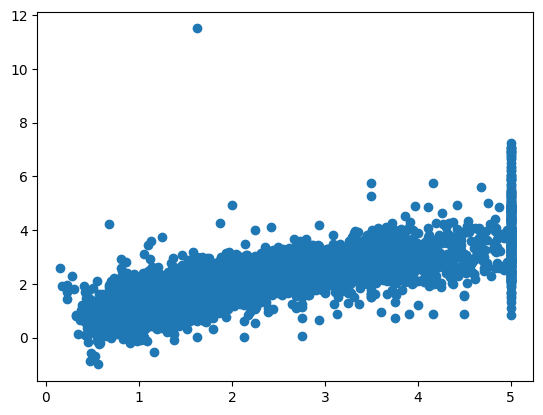

In [65]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [66]:
## Residuals
residuals=y_test-reg_pred

In [67]:
residuals

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: Price, Length: 6192, dtype: float64

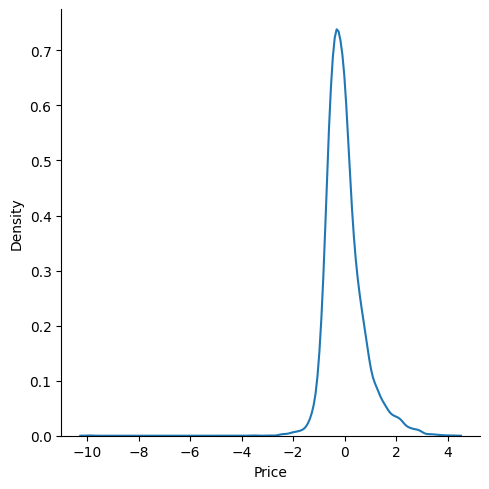

In [68]:
sns.displot(residuals,kind="kde")


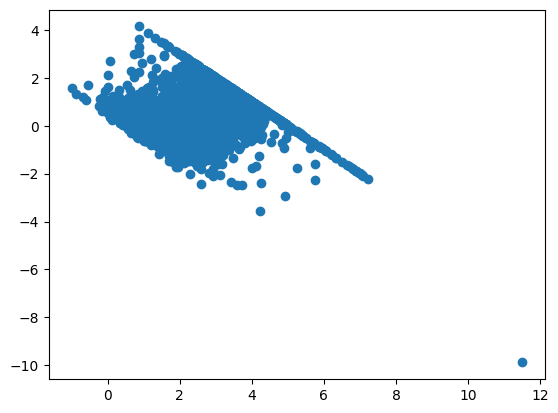

In [69]:
plt.scatter(reg_pred,residuals)


In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5272474538305952
0.5305677824766752
0.7284008391515452


In [71]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5957702326061665


In [72]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5952472117200027

In [73]:
X1 = pd.DataFrame(housing.data, columns=housing.feature_names)
y1= housing.target

In [77]:
X1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [82]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [83]:
selector = SelectKBest(f_classif, k=5)  # Select top 5 features
X1_selected = selector.fit_transform(X1, y1)
feature_names_selected = [X1.columns[i] for i in selector.get_support(indices=True)]

In [84]:
# Split data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_selected, y1, random_state=42)

# Standardize features (optional)
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [85]:
# Train the linear regression model
model = LinearRegression()
model.fit(X1_train_scaled, y1_train)

# Evaluate the model performance
# R-squared score
r2 = model.score(X1_test_scaled, y1_test)
print("R-squared:", r2)


R-squared: 0.5941175055851051
